# Datan analysointia

Tämä on Jupyter-notebook, jossa ThingSpeakista ladattua csv-muotoista säädataa voidaan analysoida.
Jupyter-notebook on ympäristö, jossa voidaan käyttää esimerkiksi Python-kieltä ohjelmointiin sekä Markdown-kieltä dokumentointiin.
Notebook koostuu soluista, joiden sisältö on Python- tai Markdown-tyyppisiä.

## Datan lataaminen

Datana on csv-tiedostoja, joissa kaikissa on viisi saraketta:
- `datetime`: aikaleima
- `entry_id`: ThingSpeak-kanavaan syötetyn datatietueen järjestysnumero.
- `temperature`: Sääaseman anturin tuottama **lämpötila**.
- `humidity`: Sääaseman anturin tuottama **ilmankosteus**.
- `uptime`: Aika, jonka sääasema on sillä hetkellä ollut yhtäjaksoisesti käynnissä. Millisekunteja.

Kukin mittaus on tiedostoissa yhtenä rivinä.

Analysointiin käytetään Pythonin Pandas-kirjastoa, jolla voidaan lukea ja käsitellä taulukkomuotoista dataa.
Kuvaajan piirtämiseen käytetään Matplotlib-kirjaston Pyplot-moduulia.

In [60]:
## Ladattavien tiedostojen nimet
filenamea = 'Petri_1-2023-04-13.csv'
filenameb = 'Petri_1-2023-04-20.csv'
filename0 = 'Petri_1-2023-04-27.csv'
filename1 = 'Petri_1-2023-05-04.csv'
filename2 = 'Petri_1-2023-05-11.csv'
filename3 = 'Petri_1-2023-05-18.csv'
## Sarakkeiden otsikot
hnames = ["datetime", "entry_id", "temperature", "humidity", "uptime"]
## Ladataan Pandas- ja Numpy-kirjastot.
import pandas as pd
import numpy as np
## Ladataan kukin csv-tiedosto omaan Pandas-dataframe-objektiin.
## CSV:n sarake-erottimena pilkku, desimaalierottimena piste.
## Käytetään edellä lueteltuja sarakkeiden otsikoita tiedostoissa olevien sijaan.
dfa = pd.read_csv(filenamea, sep=',', decimal='.', names=hnames, header=0)
dfa['datetime'] = pd.to_datetime(dfa['datetime'])
dfa.set_index('datetime', inplace=True)
dfb = pd.read_csv(filenameb, sep=',', decimal='.', names=hnames, header=0)
dfb['datetime'] = pd.to_datetime(dfb['datetime'])
dfb.set_index('datetime', inplace=True)
df0 = pd.read_csv(filename0, sep=',', decimal='.', names=hnames, header=0)
df0['datetime'] = pd.to_datetime(df0['datetime'])
df0.set_index('datetime', inplace=True)
df1 = pd.read_csv(filename1, sep=',', decimal='.', names=hnames, header=0)
df1['datetime'] = pd.to_datetime(df1['datetime'])
df1.set_index('datetime', inplace=True)
df2 = pd.read_csv(filename2, sep=',', decimal='.', names=hnames, header=0)
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2.set_index('datetime', inplace=True)
df3 = pd.read_csv(filename3, sep=',', decimal='.', names=hnames, header=0)
df3['datetime'] = pd.to_datetime(df3['datetime'])
df3.set_index('datetime', inplace=True)
## Yhdistetään taulukot yhdeksi isommaksi taulukoksi laittamalla ne peräkkäin.
df = pd.concat([dfa, dfb, df0, df1, df2, df3])
## Taulukon alkua ja loppua tulostuu näkyviin sekä taulukon koko.
df.dropna(inplace=True)
df

,entry_id,temperature,humidity,uptime
datetime,,,,
2023-04-10 13:50:43+00:00,2,26.0,16.2,8965.0
2023-04-10 13:51:04+00:00,3,26.0,16.1,30096.0
2023-04-10 13:51:21+00:00,4,26.0,16.0,46990.0
2023-04-10 13:51:53+00:00,5,26.0,16.1,79755.0
2023-04-10 13:52:11+00:00,6,26.0,15.8,97716.0
...,...,...,...,...
2023-05-17 23:41:45+00:00,17235,11.7,48.9,122718871.0
2023-05-17 23:45:31+00:00,17236,11.6,48.7,122945198.0
2023-05-17 23:51:58+00:00,17237,11.5,48.8,123332099.0


## Kuvaajan piirtäminen

Piirretään datasta kuvaaja, jossa $x$-akselina on mittausaika, vasempana $y$-akselina lämpötila ja oikeana $y$-akselina suhteellinen ilmankosteus. Piirretään lämpötila oranssilla ja ilmankosteus sinisellä käyrällä.

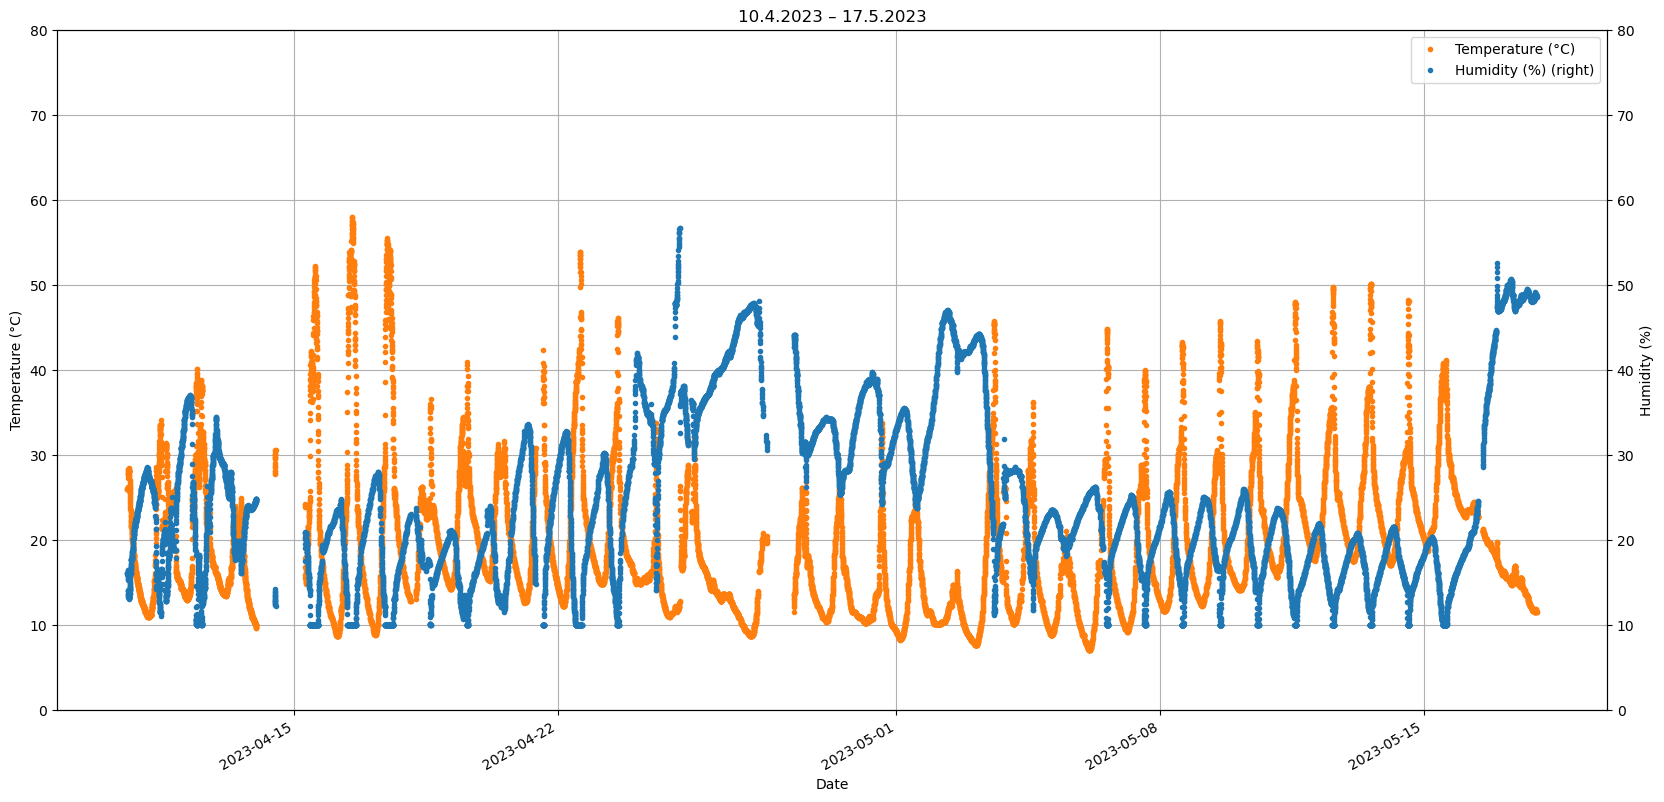

In [61]:
## Ladataan matplotlib-kirjaston pyplot.
import matplotlib.pyplot as plt
## Otetaan taulukosta vainhalutut sarakket.
tdata = df[["temperature", "humidity"]]
## Poimitaan ensimmäisen ja viimeisen näytteen ajat.
fdate = tdata.index[0]
ldate = tdata.index[-1]
## Muodostetaan kuvaajan otsikko, jossa on aloituksen päiväys ja lopeutspäiväys.
title = str(fdate.day) + "." + str(fdate.month) + "." + str(fdate.year) + " – " + str(ldate.day) + "." + str(ldate.month) + "." + str(ldate.year)
## Otetaan piirto-objektista esiin tarvittavat aliobjektit, joille voidaan säätää ominaisuuksia.
fig, ax = plt.subplots()
## Asetetaan piirroksen otsikko.
plt.title(title)
## Asetetaan kuvaajan koko.
fig.set_figwidth(20)
fig.set_figheight(10)
## Piirretään kuvaajat ja ruudukko.
temp = tdata["temperature"].plot(ax=ax, style='.', color="C1", label="Temperature (°C)")
plt.grid(visible=True)
hum = tdata["humidity"].plot(ax=ax, style='.', color="C0", label="Humidity (%)", secondary_y=True)
## y-akseleiden ja x-akselin otsikot
ax.set_ylabel("Temperature (°C)")
ax.right_ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Date")
## Käytetään molemmille y-akseleille samaa skaalaa 0...80.
ax.set_ylim([0, 80])
ax.right_ax.set_ylim([0, 80])
## Selitelaatikko paikoilleen.
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
## Piirretään muodostettu kuva näkyviin.
plt.show()

## Minimi- ja maksimilämpötilat

Poimitaan aineistosta kunkin päivän minimi- ja maksimilämpötilat ja piirretään ne kuvaajaan.

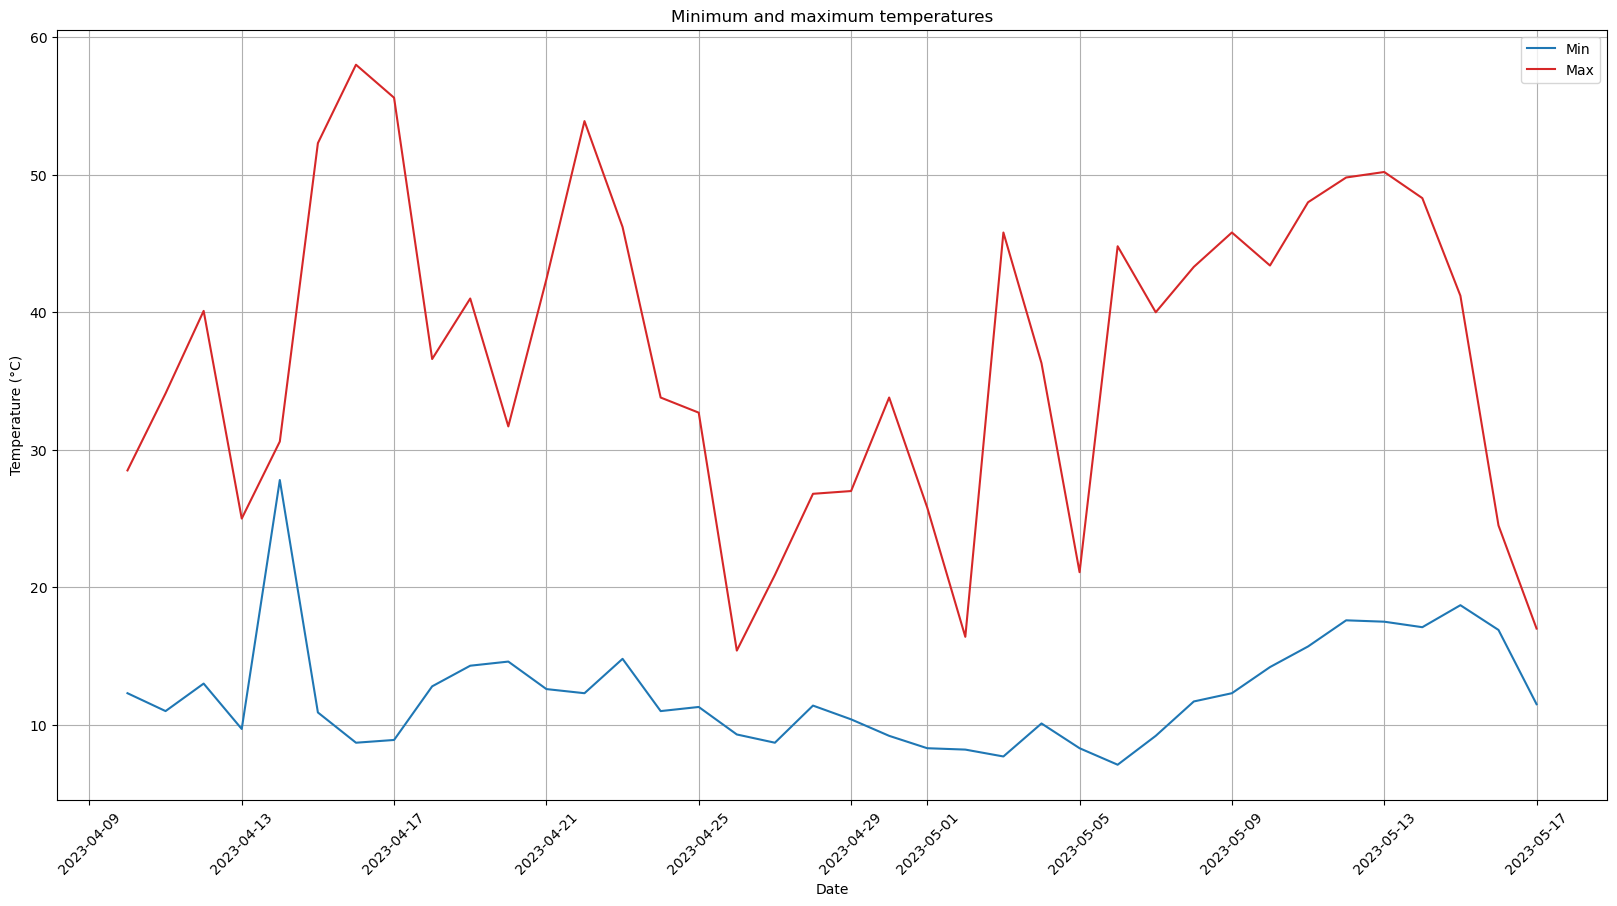

In [62]:
## Otetaan datasta vain lämpötilasarake.
temps = tdata[["temperature"]]
temps["date"] = temps.index.date
min_temp = temps.groupby(["date"]).min()
max_temp = temps.groupby(["date"]).max()
fig, ax = plt.subplots()
plt.title("Minimum and maximum temperatures")
## Asetetaan kuvaajan koko.
fig.set_figwidth(20)
fig.set_figheight(10)
ax.set_ylabel('Temperature (°C)')
min_temp.plot(ax=ax, style="-", color="C0", label="Minimum (°C)")
max_temp.plot(ax=ax, style="-", color="C3", label="Maximum (°C)")
ax.legend(["Min", "Max"])
ax.set_xlabel('Date')
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.show()

## Minimi ja maksimi suhteellinen kosteus

Piirretään vastaavasti suhteellisen kosteuden minimi ja maksimi kuvaajaan.

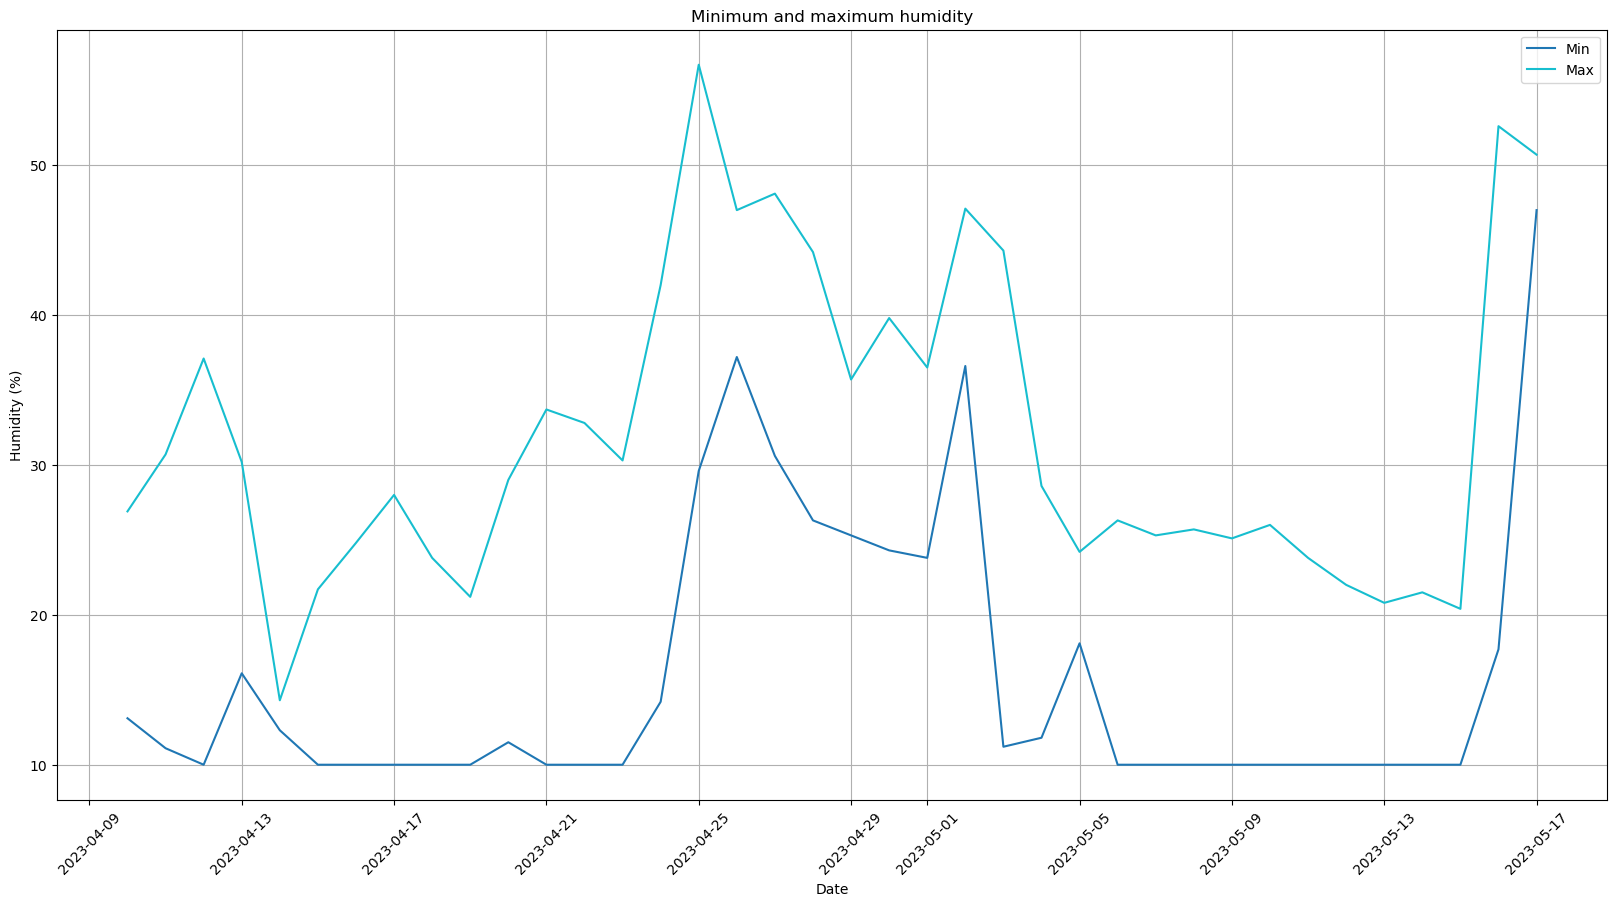

In [63]:
## Otetaan datasta vain lämpötilasarake.
hums = tdata[["humidity"]]
hums["date"] = hums.index.date
min_hum = hums.groupby(["date"]).min()
max_hum = hums.groupby(["date"]).max()
fig, ax = plt.subplots()
plt.title("Minimum and maximum humidity")
## Asetetaan kuvaajan koko.
fig.set_figwidth(20)
fig.set_figheight(10)
ax.set_ylabel('Humidity (%)')
min_hum.plot(ax=ax, style="-", color="C0", label="Minimum (%)")
max_hum.plot(ax=ax, style="-", color="C9", label="Maximum (%)")
ax.legend(["Min", "Max"])
ax.set_xlabel('Date')
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.show()

Tästä kuvaajasta voi päätellä, että ilmeisesti sensorin alaraja näyttää olevan 10 prosentin tienoilla, koska mittaustulokset eivät mene sen alle.